In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# --- 2. SETUP FOR ACADEMIC STYLE ---

font1 = 18
font2 = 16
font3 = 20

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": font1,
    "axes.labelsize": font3,
    "legend.fontsize": font1,
    "xtick.labelsize": font2,
    "ytick.labelsize": font2,
    "figure.titlesize": font3,
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}",
    # Line Widths
    "lines.linewidth": 1.7, # Main plot lines
    "axes.linewidth": 1.,  # Axis spine width
    "grid.linewidth": 1.0,  # Grid line width
    
    # Tick/Marker Properties
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
})

## Load data

In [3]:
types = 'crx'

In [4]:
loc = "../local_data/he2_log1"

energies_ng_1 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_1 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_1 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_1 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [5]:
loc = "../local_data/he2_log3"

energies_ng_2 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_2 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_2 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_2 = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [6]:
exact_energy = -5.74032428
thetas = np.linspace(0, 3 * np.pi, 10)

colors = ['#58c287', '#d7263d'] # Blue and Green
cmap_hee = LinearSegmentedColormap.from_list('custom_blue', ["#7bade2", '#00429d'])
cmap_ng = LinearSegmentedColormap.from_list('custom_green', ["#b8daca", '#58c287'])
name = 'sgd'

In [7]:
min_ng_1 = np.min(energies_ng_1, axis=1)[:,-1]-exact_energy
min_ng_2 = np.min(energies_ng_2, axis=1)[:,-1]-exact_energy

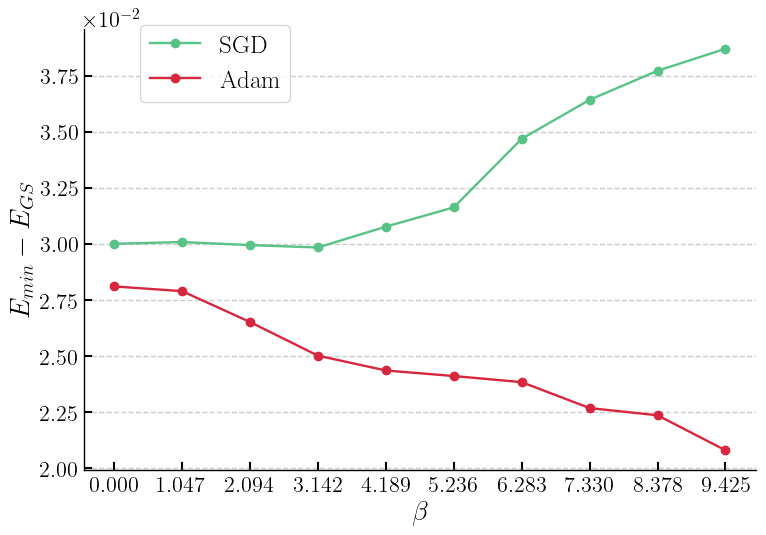

In [9]:
# --- 2. CREATE FIGURE AND AXES ---
# This gives us direct control over the figure and the axes (the plot area)
fig, ax = plt.subplots(figsize=(8, 6))

# --- 3. PLOT THE DATA ---
# We now use `ax.plot()` instead of `plt.plot()`
ax.plot(thetas, min_ng_1, marker='o', linestyle='-', label='SGD', color=colors[0])
ax.plot(thetas, min_ng_2, marker='o', linestyle='-', label='Adam', color=colors[1])

# If you were plotting the difference from the exact energy, you would do this instead:
# ax.plot(thetas, min_ng_1 - exact_energy, marker='o', linestyle='--', label='QResNet w/ SGD', color=colors[0])
# ax.plot(thetas, min_ng_2 - exact_energy, marker='s', linestyle='-', label='QResNet w/ Adam', color=colors[1])

# --- 4. STYLING AND LABELS ---
# Set axis labels using the `ax` object
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$E_{min} - E_{GS}$')
# ax.set_ylabel(r'$E_{min} - E_{exact}$') # Use this label if plotting the difference

# Apply the clean aesthetic by removing the top and right plot borders
ax.spines[['right', 'top']].set_visible(False)

# Add a subtle horizontal grid for better readability
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.4)

# Ensure all your data points have a tick on the x-axis
ax.set_xticks(thetas)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', direction='in', length=6)

# --- 5. CREATE A FIGURE-LEVEL LEGEND ---
# Get handles and labels from the axis to create a legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
# Place the legend at the top of the figure, centered, with two columns
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.18, .90), ncol=1, frameon=True)

# --- 6. FINALIZE AND SHOW/SAVE ---
# Adjust layout to prevent labels from overlapping and make space for the top legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

# To save the figure, uncomment the lines below
# name = "sgd_vs_adam" 
fig.savefig("sgd_vs_adam.pdf", format="pdf", bbox_inches='tight')
